In [99]:
# module ini akan mempelajari mengenai NLP

# perbedaan rnn,nn dan cnn 
# Recurrent Neural Network (RNN), Neural Network (NN), dan Convolutional Neural Network (CNN) adalah tiga jenis arsitektur yang berbeda dalam dunia pemodelan jaringan saraf tiruan. Berikut adalah perbedaan antara ketiganya:

# Neural Network (NN):

# Juga dikenal sebagai feedforward neural network.
# Dirancang untuk pemrosesan data yang tidak memiliki struktur sekuensial atau spasial, seperti data tabular.
# Tidak memiliki memori internal dan tidak memiliki kemampuan untuk mengatasi data sekuensial atau spasial.
# Umumnya terdiri dari lapisan input, lapisan tersembunyi, dan lapisan output.
# Cocok untuk tugas-tugas seperti klasifikasi gambar statis, pengenalan pola sederhana, dan masalah regresi.
# Convolutional Neural Network (CNN):

# Dikhususkan untuk pemrosesan data dengan struktur spasial, seperti gambar.
# Menggunakan operasi konvolusi untuk mengekstrak fitur-fitur dari data gambar.
# Memiliki lapisan konvolusi yang mampu mengidentifikasi pola dan fitur-fitur berulang pada gambar.
# Dilengkapi dengan lapisan pooling untuk mereduksi dimensi data dan menjaga invariansi terhadap translasi.
# Cocok untuk tugas-tugas pengenalan gambar, segmentasi, dan tugas-tugas di mana struktur spasial penting.
# Recurrent Neural Network (RNN):

# Dirancang untuk memproses data sekuensial dengan mempertahankan informasi dari langkah waktu sebelumnya.
# Memiliki sel memori internal yang memungkinkan pemahaman konteks dan hubungan dalam data sekuensial.
# Cocok untuk tugas-tugas seperti pemrosesan bahasa alami (NLP), pengenalan tulisan tangan, dan deret waktu.
# Mengatasi masalah gradien yang hilang pada data sekuensial dengan menggunakan variasi seperti LSTM dan GRU.
# Dapat menangkap pola temporal dan hubungan yang berkaitan dengan urutan data.
# Dengan kata lain, perbedaan antara ketiganya adalah bahwa CNN difokuskan pada data gambar dan struktur spasial, sedangkan RNN adalah untuk data sekuensial dengan kemampuan untuk mempertahankan konteks dari langkah waktu sebelumnya. Neural Network (NN) adalah arsitektur dasar yang cocok untuk data tabular dan tugas-tugas sederhana yang tidak memerlukan informasi sekuensial atau spasial. Pilihan arsitektur tergantung pada jenis data dan tugas yang Anda hadapi.


# mengeanai data sekuensial dan mengapa text disebutkan sebagai data sekuensial 
# Data sekuensial (sequence data) merujuk pada jenis data di mana elemen-elemen atau komponen-komponennya diatur dalam urutan tertentu. Setiap elemen dalam urutan ini memiliki hubungan dengan elemen sebelumnya dan sesudahnya. Contoh umum dari data sekuensial adalah teks, deret waktu, DNA, urutan musik, dan sejenisnya.

# Teks sering disebut sebagai data sekuensial karena kalimat dan kata-kata dalam teks memiliki urutan yang bermakna. Dalam konteks pemrosesan bahasa alami (Natural Language Processing atau NLP), teks dianggap sebagai urutan kata-kata atau karakter yang membentuk kalimat atau dokumen. Keberadaan kata tertentu dalam teks dapat memiliki arti yang berbeda tergantung pada kata-kata sebelumnya dan sesudahnya.

# Alasan mengapa teks disebut sebagai data sekuensial adalah karena sifatnya yang berurutan dan terstruktur. Informasi dalam teks sering kali tergantung pada urutan kata-kata, dan struktur ini menjadi penting untuk pemahaman konteks dan makna dalam teks. Contoh sederhana: dalam kalimat "Anjing mengejar kucing," jika kita tukar urutan kata menjadi "Kucing mengejar anjing," maknanya akan berubah sepenuhnya.

# Dalam pengolahan data sekuensial, seperti teks, metode analisis yang khusus digunakan seperti Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, dan Gated Recurrent Unit (GRU) networks. Metode ini dirancang untuk memahami hubungan urutan dalam data dan mempertahankan informasi dari langkah waktu sebelumnya, yang penting untuk pemahaman konteks dan makna dalam data sekuensial.

In [100]:
vocab = {}  # maps word to integer representing it
word_encoding = 1
def bag_of_words(text):
  global word_encoding

  words = text.lower().split(" ")  # create a list of all of the words in the text, well assume there is no grammar in our text for this example
  bag = {}  # stores all of the encodings and their frequency

  for word in words:
    if word in vocab:
      # dapatkan index dari kata : 
      # misal the : 3 (3 menandakan posisi the untuk pertama kali di dalam sentence)
      encoding = vocab[word]  # get encoding from vocab
    else:
      # jika tidak ada maka index akan setara dengan word_encoding
      vocab[word] = word_encoding
      encoding = word_encoding
      #  encoding akan setara dengan index kata
      word_encoding += 1
      # jumlahkan index kata
    
    if encoding in bag:
      # cek apakah index kata sudah ada di dalam bag, misal the : 3, dan di dalam bag ada key = 3, maka value key akan ditambahkan dengan satu 
      bag[encoding] += 1
    else:
      # jika tidak ada maka akan dibuatkan dengan index encoding dan disiikan nilai 1
      bag[encoding] = 1
  
  return bag

text = "this is a test to see if this test will work is is test a a"
bag = bag_of_words(text)
print(bag)

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}


In [101]:
bag
# isinya adalah index katan dan frekuensi

{1: 2, 2: 3, 3: 3, 4: 3, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}

In [102]:
vocab 
# berisikan kata : index kata, index kata ini yang akan dimasukan ke dalam bag 

{'this': 1,
 'is': 2,
 'a': 3,
 'test': 4,
 'to': 5,
 'see': 6,
 'if': 7,
 'will': 8,
 'work': 9}

In [103]:
#  konsep word embedding 
# Word embedding adalah representasi numerik dari kata-kata dalam bentuk vektor dalam ruang berdimensi rendah. Konsep ini merupakan teknik populer dalam pemrosesan bahasa alami (NLP) yang digunakan untuk mewakili kata-kata dalam bentuk yang lebih terstruktur dan berarti bagi komputer. Tujuannya adalah untuk mengatasi beberapa masalah yang terkait dengan representasi kata-kata dalam bentuk one-hot encoding atau matriks term-dokumen yang sangat besar dan jarang.

# Dalam representasi one-hot encoding, setiap kata direpresentasikan sebagai vektor biner yang memiliki panjang yang sama dengan jumlah total kata dalam korpus. Namun, pendekatan ini memiliki beberapa kelemahan, seperti ketidakmampuan untuk menangkap hubungan semantik antara kata-kata dan dimensinya yang sangat tinggi. Word embedding mengatasi masalah ini dengan merujuk pada konsep bahwa kata-kata yang sering muncul bersama cenderung memiliki makna yang mirip.

# Proses penciptaan word embedding melibatkan melatih model pada tugas tertentu, seperti pemrosesan bahasa atau tugas prediksi kata berikutnya, menggunakan sejumlah besar teks. Model tersebut akan belajar mewakili kata-kata dalam bentuk vektor sedemikian rupa sehingga kata-kata yang sering muncul bersama memiliki representasi vektor yang dekat dalam ruang embedding.

# Contoh paling terkenal dari word embedding adalah Word2Vec, yang diperkenalkan oleh Mikolov et al. pada tahun 2013. Metode ini melatih model untuk meramalkan kata berikutnya dalam konteks tertentu, sehingga menghasilkan vektor yang merepresentasikan kata-kata dalam ruang dengan makna yang terkait. Selain Word2Vec, ada juga metode lain seperti GloVe (Global Vectors for Word Representation) dan FastText.

# Word embedding sangat berguna dalam berbagai tugas NLP seperti pemrosesan teks, analisis sentimen, pencarian informasi, dan bahkan penerjemahan mesin. Dengan menerjemahkan kata-kata ke dalam representasi numerik, komputer dapat lebih baik memahami dan memanipulasi teks dalam cara yang lebih bermakna.
# jadi jika terdapat k1 (kata 1) dan k2 (kata 2 ) dan kedua kata itu memiliki selisih sudut vektor yang kecil maka dengan konsep word embedding maka akan dianggap sama, dan sebaliknya jika sudut nya beda jauh maka akan dianggap kata yang memiliki beda makna 

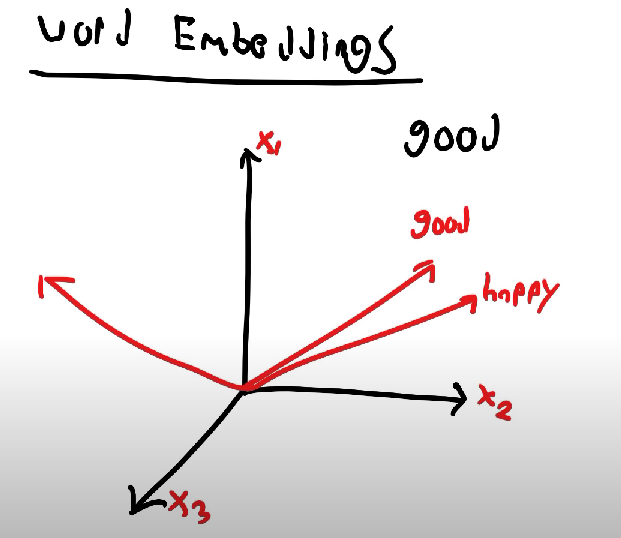

In [104]:
#  cara kerja dari rnn
# Recurrent Neural Networks (RNNs) adalah jenis arsitektur jaringan saraf buatan yang dirancang khusus untuk memproses data berurutan, seperti urutan kata dalam kalimat atau deret waktu. Mereka memiliki kemampuan untuk mengambil konteks sebelumnya dalam data berurutan untuk memahami dan menghasilkan keluaran yang lebih baik. Cara kerja RNN melibatkan penggunaan kembali informasi dari iterasi sebelumnya dalam rangkaian data masukan saat memproses setiap langkah berikutnya.

# Cara kerja RNN secara umum adalah sebagai berikut:

# Langkah Pertama: Pada langkah pertama, input pertama (misalnya, kata pertama dalam kalimat) diberikan sebagai input ke sel RNN. Sel ini memiliki dua input: input aktual dan juga output dari iterasi sebelumnya (ketika iterasi pertama, biasanya diinisialisasi dengan vektor nol atau nilai acak kecil).

# Proses dalam Setiap Iterasi: Selama setiap iterasi, RNN menggabungkan input saat ini dengan output dari iterasi sebelumnya dan menghasilkan output saat ini. Proses ini menciptakan suatu bentuk "memori" internal yang mencerminkan informasi dari langkah-langkah sebelumnya dalam urutan.

# Pemeliharaan State: State atau keadaan internal ini dianggap sebagai representasi internal dari konteks sebelumnya dalam urutan. Ini memungkinkan RNN untuk "mengingat" informasi yang relevan dari langkah-langkah sebelumnya.

# Iterasi Berikutnya: Selanjutnya, langkah-langkah berikutnya dalam urutan (misalnya, kata-kata berikutnya dalam kalimat) dimasukkan sebagai input berikutnya ke sel RNN. Pada saat ini, sel RNN tidak hanya mempertimbangkan input saat ini, tetapi juga informasi yang terkandung dalam state internal dari iterasi sebelumnya.

# Keluaran dan Prediksi: Keluaran dari sel RNN pada setiap langkah iterasi dapat digunakan untuk tugas yang berbeda-beda, seperti analisis sentimen, prediksi deret waktu, atau bahkan generasi teks. Di setiap langkah, output dapat diproses lebih lanjut atau digunakan untuk mengambil keputusan.


# contoh pada sebuah kalimat
# Iterasi 1 - Input: "Saya"

# Input kata "Saya" dikodekan sebagai vektor numerik dan diberikan sebagai input pertama ke RNN.
# RNN menghitung output berdasarkan input ini dan mengingat state internal (yang biasanya diinisialisasi sebagai vektor nol atau nilai acak kecil).
# Iterasi 2 - Input: "suka"

# Input kata "suka" diberikan sebagai input berikutnya ke RNN.
# RNN menggabungkan input saat ini dengan state internal dari iterasi sebelumnya, yang mencerminkan informasi dari kata "Saya".
# RNN menghasilkan output berdasarkan kombinasi input dan state internal saat ini.
# Iterasi 3 - Input: "makan"

# Input kata "makan" diberikan sebagai input berikutnya ke RNN.
# RNN kembali menggabungkan input saat ini dengan state internal sebelumnya, yang sekarang mencerminkan informasi dari kata-kata sebelumnya ("Saya" dan "suka").
# RNN menghitung output lagi berdasarkan input dan state internal saat ini.
# Iterasi 4 - Input: "nasi"

# Input kata "nasi" diberikan sebagai input terakhir ke RNN.
# RNN menggabungkan input dengan state internal sebelumnya yang sekarang mencerminkan semua informasi dari kalimat sebelumnya ("Saya", "suka", "makan").
# RNN menghitung output final berdasarkan input dan state internal saat ini.


#  kelemahan dari rnn 
# Kelemahan utama dari RNN adalah masalah yang dikenal sebagai "vanishing gradient". Ini terjadi saat proses pembelajaran pada RNN, terutama selama proses backpropagation, gradien yang dikirimkan ke langkah-langkah awal dalam urutan menjadi sangat kecil sehingga bobot-bobot dalam jaringan memiliki sedikit atau tidak ada perubahan. Ini mengakibatkan langkah-langkah awal dalam urutan tidak dapat memperbarui diri mereka sendiri dengan benar dan akhirnya tidak dapat "mengingat" informasi dari langkah-langkah sebelumnya dalam urutan.

# Contoh sederhana untuk menjelaskan vanishing gradient adalah dalam tugas yang melibatkan prediksi kata berikutnya dalam kalimat. Anggaplah Anda memiliki kalimat: "Saya suka makan nasi." dan Anda ingin memprediksi kata berikutnya setelah "suka". RNN harus dapat memahami bahwa konteks "Saya suka" akan berkontribusi pada pemilihan kata berikutnya.

# Namun, jika Anda memiliki RNN sederhana dengan banyak langkah (misalnya, 10 langkah) dan menggunakan fungsi aktivasi seperti sigmoid, maka saat gradien dihitung kembali melalui langkah-langkah ini, gradien dapat menjadi sangat kecil (kurang dari 1) saat dikalikan dengan berulang. Akibatnya, pembelajaran di langkah-langkah awal menjadi terhambat karena bobot-bobot ini hanya sedikit berubah, sehingga RNN kesulitan untuk menangkap konteks dari langkah-langkah jauh dalam urutan.

# Dalam kasus kalimat "Saya suka makan nasi." jika gradien menghilang saat bergerak mundur dalam iterasi, RNN mungkin tidak dapat sepenuhnya memahami konteks "Saya suka" saat mencoba memprediksi kata "makan" atau "nasi", karena informasi ini tidak dapat mencapai langkah awal dalam urutan.

# Untuk mengatasi masalah vanishing gradient, arsitektur seperti LSTM (Long Short-Term Memory) dan GRU (Gated Recurrent Unit) dikembangkan. Kedua arsitektur ini menggunakan mekanisme internal yang memungkinkan mereka untuk lebih efektif mengalirkan gradien melalui langkah-langkah jauh dalam urutan, sehingga memungkinkan RNN untuk lebih baik dalam "mengingat" informasi kontekstual.


# dibawah ini terdapat ilustrasi bagaimana kerja dari rnn yang sederhana 

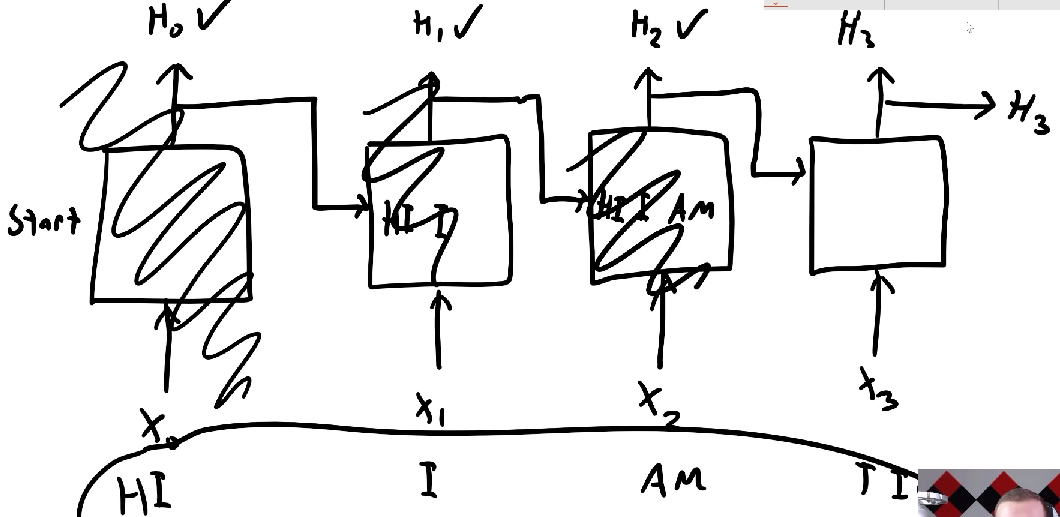

In [105]:
#  penjelasan mengenai cara kerja dari rnn dengan memanfaatkan lstm concept
# Long Short-Term Memory (LSTM) adalah jenis arsitektur jaringan saraf rekuren (RNN) yang dirancang khusus untuk mengatasi masalah "vanishing gradient" dan memahami hubungan temporal dalam data berurutan. LSTM memiliki kemampuan untuk "mengingat" informasi jangka panjang dalam urutan data dengan menggunakan mekanisme pintu (gates) yang mengatur aliran informasi di dalam sel LSTM.

# Cara kerja LSTM dapat dijelaskan sebagai berikut:

# 1. **Cell State (State Sel)**: LSTM memiliki suatu state internal yang disebut cell state (state sel). Ini adalah bentuk "memori" panjang yang dapat mengingat informasi dalam urutan data jangka panjang. Pada setiap langkah iterasi, informasi baru dapat ditambahkan ke state sel atau dihapus darinya.

# 2. **Gates (Pintu)**: Salah satu fitur utama LSTM adalah penggunaan tiga jenis pintu yang mengatur aliran informasi dalam dan keluar dari sel LSTM. Pintu ini mengontrol bagaimana data baru diintegrasikan ke dalam state sel dan bagaimana state sel diperbarui.

#    - **Forget Gate (Pintu Lupakan)**: Pintu ini mengatur sejauh mana informasi yang saat ini ada dalam state sel akan dilupakan. Ini membantu dalam menghapus informasi yang tidak lagi relevan dalam urutan data.
#    - **Input Gate (Pintu Masukan)**: Pintu ini mengatur bagaimana informasi baru akan ditambahkan ke dalam state sel. Informasi ini dihitung berdasarkan input saat ini dan hidden state sebelumnya.
#    - **Output Gate (Pintu Keluaran)**: Pintu ini mengatur bagaimana state sel akan dioutputkan. Ini membantu dalam menghasilkan output yang relevan berdasarkan state sel saat ini.

# 3. **Hidden State (State Tersembunyi)**: Selain state sel, LSTM juga memiliki hidden state, yang berfungsi sebagai representasi internal saat ini yang akan dioutputkan pada iterasi berikutnya. Hidden state ini dihitung berdasarkan state sel saat ini dan diatur oleh pintu keluaran.

# 4. **Iterasi Berikutnya**: Selama setiap iterasi berikutnya, LSTM menerima input dari langkah-langkah sebelumnya dan menggabungkannya dengan hidden state sebelumnya. Pintu-pintu LSTM mengatur aliran informasi dan pembaruan state sel.

# LSTM memungkinkan aliran gradien yang lebih efektif melalui iterasi, mengatasi masalah "vanishing gradient" yang ada pada RNN tradisional. Dengan pintu-pintu yang mengatur aliran informasi dan mengingat informasi dalam state sel, LSTM dapat mengatasi tantangan dalam pemahaman konteks jangka panjang dalam urutan data. LSTM telah terbukti sangat sukses dalam berbagai tugas NLP dan pemrosesan deret waktu, termasuk penerjemahan mesin, analisis sentimen, dan prediksi deret waktu.



# Kata-kata dalam kalimat: "Saya suka makan nasi."

# Kita akan mengasumsikan bahwa setiap kata diubah menjadi representasi vektor (embedding) sebelum dimasukkan ke dalam LSTM.

# Iterasi Pertama - Input: "Saya"

# Kata pertama "Saya" diubah menjadi representasi vektor dan diberikan sebagai input pertama ke LSTM.
# LSTM menghitung output berdasarkan input ini dan mengatur hidden state awal (diinisialisasi dengan nilai tertentu atau nol).
# LSTM juga menggunakan pintu masukan dan pintu keluaran untuk mengatur aliran informasi dalam state sel dan hidden state.
# Iterasi Kedua - Input: "suka"

# Kata kedua "suka" diubah menjadi representasi vektor dan dimasukkan sebagai input berikutnya ke LSTM.
# LSTM menggabungkan input saat ini dengan hidden state dari iterasi sebelumnya.
# LSTM menggunakan pintu masukan untuk menghitung bagaimana informasi dari "suka" akan ditambahkan ke dalam state sel.
# LSTM menghitung output berdasarkan kombinasi input dan hidden state saat ini.
# Iterasi Ketiga - Input: "makan"

# Kata ketiga "makan" diubah menjadi representasi vektor dan dimasukkan sebagai input berikutnya ke LSTM.
# LSTM kembali menggabungkan input saat ini dengan hidden state dari iterasi sebelumnya.
# LSTM menggunakan pintu masukan untuk menghitung bagaimana informasi dari "makan" akan ditambahkan ke dalam state sel.
# LSTM menghitung output berdasarkan kombinasi input dan hidden state saat ini.
# Iterasi Keempat - Input: "nasi"

# Kata keempat "nasi" diubah menjadi representasi vektor dan dimasukkan sebagai input terakhir ke LSTM.
# LSTM sekali lagi menggabungkan input dengan hidden state dari iterasi sebelumnya.
# LSTM menggunakan pintu masukan untuk menghitung bagaimana informasi dari "nasi" akan ditambahkan ke dalam state sel.
# LSTM menghitung output final berdasarkan input dan hidden state saat ini






In [106]:
#  melakukan sentiment analysis

#  load datasets
import tensorflow  as tf
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np 
vocab_size = 88584
max_len = 250
batch_size = 64
# harus diisilkan num_words jika tidak maka akan menyebabkan errror
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=vocab_size)

In [107]:
#  melihat data train yang digunakan
train_data
#  dapat dilihat bahwa data yang ada di dalam train_data memiliki panjang yang berbeda beda, misal panjan di index pertama beda dengan panjang yang ada di index kedua

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [108]:
#  melihat label data
train_label

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [109]:
#  melakukan preprocessing
# note : karena seperti yang sudah dijelaskan diatas, terlihat bahwa panjang dari setiap index itu beda dan model machine learning tidak bisa menangani dengan panjang yang beda
# maka diperlukan penyamaan panjang dari data train dan test yang digunakan


train_data = sequence.pad_sequences(train_data, max_len)
test_data = sequence.pad_sequences(test_data, max_len)
# penjelasan : Dalam Keras, pad_sequences adalah fungsi yang digunakan untuk mengisi ulang urutan data dengan padding (biasanya dengan nilai nol) sehingga semua urutan memiliki panjang yang seragam

In [110]:
# setelah dilakukan preprocessing train_data
train_data
#  dapat dilhat bahwa ditambahkan nilai 0 untuk membuat panjang dari setiap array sama persis

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [111]:
# setelah dilakukan preprocessing (test_data)
test_data

array([[    0,     0,     0, ...,    14,     6,   717],
       [ 2679,    23,  1310, ...,   125,     4,  3077],
       [  711,  7937, 25399, ...,     9,    57,   975],
       ...,
       [    0,     0,     0, ...,    21,   846,  5518],
       [    0,     0,     0, ...,  2302,     7,   470],
       [    0,     0,     0, ...,    34,  2005,  2643]])

In [112]:
# membuat model
model = tf.keras.Sequential([
    # ketika mendefinisikan tf.keras.Sequential maka diperlukan [] karena parameter layer bisa lebih dari satu maka dibuatkan menjadi dalam bentuk list
    tf.keras.layers.Embedding(vocab_size,32),
    # mendeklarasikan panjang dari lstm yang sama dengan 32 
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
]
#  note : tf.keras.layers.Embedding adalah layer dalam TensorFlow yang digunakan untuk melakukan pembentukan representasi vektor dari data kategori, seperti kata dalam teks. Representasi vektor ini sering disebut sebagai "embedding" dan digunakan untuk mengubah data kategori menjadi representasi numerik yang dapat diproses oleh model neural network.
# jadi proses word embedding dilakukan dengan cara tf.keras.layers.Embedding, parameter vocab_size,32 dalam tf.keras.layers.embedding mewakilkan banyaknya total kata dan banyak dimensi vector
)

In [113]:
#  melihat detail model yang sudah dibangun 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          2834688   
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2843041 (10.85 MB)
Trainable params: 2843041 (10.85 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
# melakukan proses training 
# binary_crossentropy adalah fungsi kerugian (loss function) yang umum digunakan dalam tugas klasifikasi biner dalam machine learning, terutama dalam model neural network yang memiliki output berupa probabilitas yang berkisar antara 0 dan 1. Fungsi ini cocok digunakan ketika Anda memiliki dua kelas yang saling eksklusif dan ingin mengukur perbedaan antara distribusi probabilitas prediksi model dan distribusi probabilitas target.
# Cara kerja binary_crossentropy adalah dengan menghitung perbedaan antara distribusi probabilitas prediksi yang dihasilkan oleh model dan distribusi probabilitas target (ground truth) menggunakan metrik yang disebut "cross-entropy". Dalam konteks klasifikasi biner, ada dua kemungkinan output: kelas positif (1) dan kelas negatif (0).
# - (y * log(y_pred) + (1 - y) * log(1 - y_pred))


# RMSprop (Root Mean Square Propagation) adalah algoritma optimisasi yang digunakan dalam machine learning dan deep learning untuk mengoptimalkan parameter-parameter model neural network selama proses pelatihan. Algoritma ini adalah salah satu variasi dari algoritma Stochastic Gradient Descent (SGD) yang dirancang untuk mengatasi beberapa masalah yang terkait dengan SGD, terutama dalam menghadapi masalah gradien yang berfluktuasi dan masalah konvergensi yang lambat.

# Cara kerja RMSprop adalah dengan mengadaptasi laju pembelajaran (learning rate) untuk setiap parameter berdasarkan riwayat gradien sebelumnya. Ini memungkinkan RMSprop untuk mengatasi masalah di mana parameter-parameter dengan gradien besar mendominasi proses pembelajaran dan parameter-parameter dengan gradien kecil tidak dapat berkembang secara efektif.
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

# melakukan prose train dengan menggunakan fit 
history = model.fit(train_data, train_label, epochs=10, validation_split=0.2)
# disini validation tidak dibuat terpisah, jadi jumlah validation_split akan diambil sebanyak 20% dari data train

Epoch 1/10
625/625 [==============================] - 22s 34ms/step - loss: 0.4594 - accuracy: 0.7737 - val_loss: 0.3254 - val_accuracy: 0.8652
Epoch 2/10
625/625 [==============================] - 19s 31ms/step - loss: 0.2631 - accuracy: 0.8978 - val_loss: 0.2886 - val_accuracy: 0.8782
Epoch 3/10
625/625 [==============================] - 19s 31ms/step - loss: 0.2043 - accuracy: 0.9264 - val_loss: 0.2871 - val_accuracy: 0.8806
Epoch 4/10
625/625 [==============================] - 19s 31ms/step - loss: 0.1646 - accuracy: 0.9409 - val_loss: 0.2951 - val_accuracy: 0.8898
Epoch 5/10
625/625 [==============================] - 19s 31ms/step - loss: 0.1390 - accuracy: 0.9520 - val_loss: 0.3101 - val_accuracy: 0.8818
Epoch 6/10
625/625 [==============================] - 20s 31ms/step - loss: 0.1159 - accuracy: 0.9626 - val_loss: 0.3340 - val_accuracy: 0.8802
Epoch 7/10
625/625 [==============================] - 20s 32ms/step - loss: 0.1012 - accuracy: 0.9677 - val_loss: 0.3355 - val_accuracy:

In [115]:
#  mendapatkan history accuracy
import pandas as pd 
data_akurasi  = pd.DataFrame(history.history['accuracy'], columns=["akurasi"])
data_akurasi

,akurasi
0,0.77370
1,0.89775
2,0.92640
3,0.94085
4,0.95195
5,0.96260
6,0.96770
7,0.97360
8,0.97600
9,0.98200


In [116]:
# melakukan evaluasi pada model yang sudah dirancang 
model.evaluate(test_data,test_label)
# elemen pertama [0.5055281519889832] adalah nilai dari fungsi kerugian (loss function) 
# Elemen kedua [0.8490399718284607] adalah nilai dari metrik yang dipilih pada dataset pengujian. 

782/782 [==============================] - 7s 9ms/step - loss: 0.5918 - accuracy: 0.8437


[0.591759204864502, 0.8436800241470337]

In [117]:
word_index = imdb.get_word_index() 

for word, index in list (word_index.items())[:10]: 
    print(f'{word} : {index}')

fawn : 34701
tsukino : 52006
nunnery : 52007
sonja : 16816
vani : 63951
woods : 1408
spiders : 16115
hanging : 2345
woody : 2289
trawling : 52008


In [118]:
train_data

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [119]:
word_index = imdb.get_word_index() 

def encode_text(text):
    tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
    #  text_to_word_sequence merupakan fungsi yang berguna dalam proses tokenisasi / pemisahan kata 
    tokens = [[word_index[word] if word in word_index else 0 for word in tokens]]
    #  kemudian cari kata word dan simpan index nya di dalam tokens 
    return sequence.pad_sequences(tokens, max_len)[0]
#  return harus dalam bentuk [tokens] atau dengan menamnbahkan [] di variabel nya sehingga menjadi :      tokens = [[word_index[word] if word in word_index else 0 for word in tokens]]
#  sesuai dengan yang ada di dalam dokumentasi 
text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17  13  4

In [120]:
text1 = tf.keras.preprocessing.text.text_to_word_sequence(text)
print(f'isi dari text 1 adalah : {text1}')

isi dari text 1 adalah : ['that', 'movie', 'was', 'just', 'amazing', 'so', 'amazing']


In [121]:
#  melakukan prediksi 
model.save("sentiment.h5")

c:\Users\Teddy Dharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
train_data

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [123]:
load = tf.keras.models.load_model("sentiment.h5")

In [124]:
encoded

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [125]:
word_index["that"]

12

In [126]:
#  memnbuat fungsi encode 

words_list = {value: key for (key, value) in word_index.items()}

In [127]:
def decode(encoded): 
    text = ""
    for integer in encoded: 
        if integer != 0:
            #  ambil data kata dengan index integer dan kemdian tambahkan di dalam text 
            text += words_list[integer] + " "
    #  text[:-1] menentukan bahwa ambil semau, tapi tidak akan diambil yang paling belakang (' ')
    return text[:-1]
print(f'hasil dari decode : {decode(encoded)}')

hasil dari decode : that movie was just amazing so amazing


In [128]:
def do_predict(text): 
    encode = encode_text(text)
    # buat sebuah array dengan dimensi 2 dengan baris 1 dan kolom 250
    predictions = np.zeros((1, 250))
    # ganti semua data dengan yang ada di dalam encode
    predictions[0] = encode
    result_predict = model.predict(predictions)
    print(result_predict[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
do_predict(positive_review)
negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
do_predict(negative_review)

negative_review2 = "fucking movie"
do_predict(negative_review2)

negative_review2 = "very good movie"
do_predict(negative_review2)

#  cara membedakan : di bawah 0.5 maka akan masuk ke dalm negatif dan begitupun sebaliknya 
#  note :

1/1 [==============================] - 0s 352ms/step
[0.9558128]
1/1 [==============================] - 0s 30ms/step
[0.31065983]
1/1 [==============================] - 0s 25ms/step
[0.60253775]
1/1 [==============================] - 0s 21ms/step
[0.78376764]


RNN Play Generator

In [129]:
#  load  datasets
data = tf.keras.utils.get_file("rnn_play.txt",  'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [130]:
#  read dataset
text = open('rnn_play.txt', 'rb').read().decode(encoding='utf-8')
#   'rb' adalah mode pembukaan (opening mode) yang digunakan saat membuka file dalam mode baca (read) dalam bentuk biner (binary).
# print ('Length of text: {} characters'.format(len(text)))
# .decode(encoding='utf-8') artinya terjemahkan (decode) sebuah data bertipe sesuai dengan encoding  
# karena sudah dalam formating maka gunakan format(len(text) untuk mengisikan  nilai {}  

In [131]:
#  mendapatkan data sebanyak 250 data char
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to


In [132]:
# for x in text: 
#  text dalam bentuk text = open("rnn_play.txt", "rb")
# maka akan menghasilkan awalan b' yang menyatakan binary, misal : b'Before we proceed any further, hear me speak.\r\n'
#     print(x),

In [133]:
# melakukan proses encoding 
vocab = sorted(set(text))
#  set akan menampung setiap karaketer yang ada di dalam text tanpa adanya duplikasi 

In [134]:
char2indx = {u: i for i, u in enumerate(vocab)}

indx2char = np.array(vocab)



#  enumerate berfungsi memnbat mapping 
#  mendapatkan huruf serta index nya yang disimpan di dalam char2indx
char2indx

{'\n': 0,
 '\r': 1,
 ' ': 2,
 '!': 3,
 '$': 4,
 '&': 5,
 "'": 6,
 ',': 7,
 '-': 8,
 '.': 9,
 '3': 10,
 ':': 11,
 ';': 12,
 '?': 13,
 'A': 14,
 'B': 15,
 'C': 16,
 'D': 17,
 'E': 18,
 'F': 19,
 'G': 20,
 'H': 21,
 'I': 22,
 'J': 23,
 'K': 24,
 'L': 25,
 'M': 26,
 'N': 27,
 'O': 28,
 'P': 29,
 'Q': 30,
 'R': 31,
 'S': 32,
 'T': 33,
 'U': 34,
 'V': 35,
 'W': 36,
 'X': 37,
 'Y': 38,
 'Z': 39,
 'a': 40,
 'b': 41,
 'c': 42,
 'd': 43,
 'e': 44,
 'f': 45,
 'g': 46,
 'h': 47,
 'i': 48,
 'j': 49,
 'k': 50,
 'l': 51,
 'm': 52,
 'n': 53,
 'o': 54,
 'p': 55,
 'q': 56,
 'r': 57,
 's': 58,
 't': 59,
 'u': 60,
 'v': 61,
 'w': 62,
 'x': 63,
 'y': 64,
 'z': 65}

In [135]:
indx2char

array(['\n', '\r', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';',
       '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype='<U1')

In [136]:
def text_to_int(text):
    #  menterjemahkan kata menjadi bilangan sesuai dengan yang ada di dalam char2indx
    return np.array([char2indx[c] for c in text])
text_to_int_var = text_to_int(text)

In [137]:
#  hasil terjemahan dari 
print("hasil dari terjemahan : ", text_to_int_var[:13])
print("text asli : ", text[:13])
# f akan menjadi 16 begitupun seterusnya 

hasil dari terjemahan :  [19 48 57 58 59  2 16 48 59 48 65 44 53]
text asli :  First Citizen


In [138]:
text_to_int_var.shape

(1155392,)

In [139]:
#  melakukan proses decode 
# def index_to_text(text): 
#     try: 
#         text = text.numpy()
#     except: 
#         pass 
#     return ''.join(indx2char[text])

def int_to_text(ints):
  try:
    ints = ints.numpy()
  except:
    pass
  return ''.join(indx2char[ints])

In [140]:
decode = int_to_text(text_to_int_var)
decode[:13]
# jika terjadi error indx2char  error unhashable type: 'numpy.ndarray' hal ini disebabkan karena numpy() hanya dikhususkan untuk tipe data yang tidak berubah ukurannya (immutable)

'First Citizen'

In [141]:
#  creating training example 
seq_length = 100 
#  // merupakan operasi pembagian yang kemudian akan di floor kan
example_per_epochs = len(text) // seq_length
# tf.data.Dataset.from_tensor_slices adalah metode dalam pustaka TensorFlow yang digunakan untuk membuat objek dataset dari tensor-tensor yang ada
char_dataset = tf.data.Dataset.from_tensor_slices(text_to_int_var)
char_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [142]:
sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)
#  drop_remainder=True berarti bahwa jika panjang sisa dataset tidak cukup untuk membentuk batch dengan ukuran yang diinginkan, maka sisa data yang tidak cukup akan diabaikan.
#  jika karakter kurang dari jumlah seq_length + 1 maka akan diabaikan, dan data akan dibagi menjadi beberapa array dengan panjang masing masing index yaitu sama dengan seq_length + 1


In [143]:
def do_split(chunk): 
    input = chunk[:-1]
    target = chunk[1:]
    return input, target
dataset = sequences.map(do_split)
#  map akan membuat fungsi do_split akan selalu dijalankan 


In [144]:
for x in sequences.take(2):
    print(x)

tf.Tensor(
[19 48 57 58 59  2 16 48 59 48 65 44 53 11  1  0 15 44 45 54 57 44  2 62
 44  2 55 57 54 42 44 44 43  2 40 53 64  2 45 60 57 59 47 44 57  7  2 47
 44 40 57  2 52 44  2 58 55 44 40 50  9  1  0  1  0 14 51 51 11  1  0 32
 55 44 40 50  7  2 58 55 44 40 50  9  1  0  1  0 19 48 57 58 59  2 16 48
 59 48 65 44 53], shape=(101,), dtype=int32)
tf.Tensor(
[11  1  0 38 54 60  2 40 57 44  2 40 51 51  2 57 44 58 54 51 61 44 43  2
 57 40 59 47 44 57  2 59 54  2 43 48 44  2 59 47 40 53  2 59 54  2 45 40
 52 48 58 47 13  1  0  1  0 14 51 51 11  1  0 31 44 58 54 51 61 44 43  9
  2 57 44 58 54 51 61 44 43  9  1  0  1  0 19 48 57 58 59  2 16 48 59 48
 65 44 53 11  1], shape=(101,), dtype=int32)


In [145]:
print(f'sequence shape : {sequences}')
# dataset berukuran lebih kecil karena data di depan atau data di paling belakang tidak 
print(f'dataset shape : {dataset}')

sequence shape : <_BatchDataset element_spec=TensorSpec(shape=(101,), dtype=tf.int32, name=None)>
dataset shape : <_MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(100,), dtype=tf.int32, name=None))>


In [146]:
data_take = dataset.take(2)
# isi dari dataset dengan index sama dengan 2
for x in data_take:
    #  disini jika dilihat maka akan dihasilkan dua buah array, dengan bedanya yang pertama array tidak mengambil elemen terakhir yaitu 44
    # dan array kedua yang tidak mengambil index ke 0 yaitu 19
    print(x)

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([19, 48, 57, 58, 59,  2, 16, 48, 59, 48, 65, 44, 53, 11,  1,  0, 15,
       44, 45, 54, 57, 44,  2, 62, 44,  2, 55, 57, 54, 42, 44, 44, 43,  2,
       40, 53, 64,  2, 45, 60, 57, 59, 47, 44, 57,  7,  2, 47, 44, 40, 57,
        2, 52, 44,  2, 58, 55, 44, 40, 50,  9,  1,  0,  1,  0, 14, 51, 51,
       11,  1,  0, 32, 55, 44, 40, 50,  7,  2, 58, 55, 44, 40, 50,  9,  1,
        0,  1,  0, 19, 48, 57, 58, 59,  2, 16, 48, 59, 48, 65, 44])>, <tf.Tensor: shape=(100,), dtype=int32, numpy=
array([48, 57, 58, 59,  2, 16, 48, 59, 48, 65, 44, 53, 11,  1,  0, 15, 44,
       45, 54, 57, 44,  2, 62, 44,  2, 55, 57, 54, 42, 44, 44, 43,  2, 40,
       53, 64,  2, 45, 60, 57, 59, 47, 44, 57,  7,  2, 47, 44, 40, 57,  2,
       52, 44,  2, 58, 55, 44, 40, 50,  9,  1,  0,  1,  0, 14, 51, 51, 11,
        1,  0, 32, 55, 44, 40, 50,  7,  2, 58, 55, 44, 40, 50,  9,  1,  0,
        1,  0, 19, 48, 57, 58, 59,  2, 16, 48, 59, 48, 65, 44, 53])>)
(<tf.Tensor: shap

In [147]:
#  menerjemahkan dari suatu bilangan ke dalam bentuk kata 
for x, y in dataset.take(2):
    # sebenarnya satu cukup, cuma akan dibagi  menjadi  x dan y 
    print(f'x : {int_to_text(x)}')
    print(f'y : {int_to_text(y)}')



x : First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citize
y : irst Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen
x : :
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
y : 
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:


In [148]:
buffer_size = 10000
batch_size = 64
data = dataset.shuffle(buffer_size=buffer_size).batch(batch_size, drop_remainder=True)
#  dengan nilai batch_size = 64 maka akan dihasilkan sebanyak 64 baris dan kolom akan mengikuti

In [149]:
data
# TensorSpec(shape=(64, 100), dtype=tf.int32, name=None): Ini menunjukkan bahwa setiap tensor memiliki bentuk (64, 100) yang berarti tensor memiliki dimensi dua dengan panjang 64 pada dimensi pertama dan panjang 100 pada dimensi kedua.

<_BatchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int32, name=None), TensorSpec(shape=(64, 100), dtype=tf.int32, name=None))>

In [150]:
#  melihat isi dari variabel data
for x in range(3):  
    for y in data.take(x): 
        print(f'index ke {x} adala : {y}')

index ke 1 adala : (<tf.Tensor: shape=(64, 100), dtype=int32, numpy=
array([[ 2, 58, 47, ..., 52, 40, 57],
       [59, 47, 44, ..., 44, 40, 57],
       [54, 45,  2, ..., 50,  3,  1],
       ...,
       [ 2, 43, 40, ..., 51, 44, 59],
       [44, 61, 44, ..., 59, 47, 64],
       [59, 47, 44, ..., 34, 32, 11]])>, <tf.Tensor: shape=(64, 100), dtype=int32, numpy=
array([[58, 47, 44, ..., 40, 57, 57],
       [47, 44,  2, ..., 40, 57,  9],
       [45,  2, 64, ...,  3,  1,  0],
       ...,
       [43, 40, 53, ..., 44, 59,  2],
       [61, 44, 57, ..., 47, 64,  2],
       [47, 44,  2, ..., 32, 11,  1]])>)
index ke 2 adala : (<tf.Tensor: shape=(64, 100), dtype=int32, numpy=
array([[44,  9,  1, ...,  2, 52, 64],
       [59, 47,  2, ...,  2, 54, 45],
       [ 2, 47, 54, ..., 54, 53,  2],
       ...,
       [58, 40, 62, ..., 40, 48, 43],
       [53, 46, 60, ..., 58, 60, 57],
       [59, 54, 53, ..., 55, 40, 59]])>, <tf.Tensor: shape=(64, 100), dtype=int32, numpy=
array([[ 9,  1,  0, ..., 52, 64,  2

In [151]:
# building model  
vocab_size = len(vocab)
embedding_dim =256
rnn_units = 1024

model = tf.keras.models.Sequential([
    #  di dalam tf.keras.embedding berisikan input dimensi, output dimensi dan ukuran dari batch_input_shape
    #  berdasarkan variabel data terlihat bahwa ukruannya adalah 64, 100 yang menandakan seharusnya batch_input_shape harus dalam btnuk dua dimensi
    # batch_input_shape = [batch_size, None] adalah parameter yang dapat digunakan saat mendefinisikan struktur input untuk lapisan dalam model jaringan saraf tiruan (neural network) menggunakan TensorFlow atau Keras. Ini mengacu pada dimensi input data dalam bentuk batch, yang merupakan bagaimana data disusun dalam setiap iterasi pelatihan atau inferensi dalam model.
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape = [batch_size, None]), 
    # tf.keras.embedding merupakan merupakan modul yang akan digunakan dalam representasi vector
    tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
    # rnn_units: Ini adalah jumlah unit LSTM dalam lapisan. Unit-unit ini mewakili jumlah sel LSTM yang akan digunakan dalam lapisan tersebut. Semakin banyak unit, semakin kompleks dan kuat jaringan tersebut
    # stateful=True: Ini menunjukkan bahwa lapisan LSTM akan "memegang" keadaan (state) antara batch yang berbeda. Ini cocok untuk kasus di mana data dalam batch dianggap sebagai kelanjutan dari data dalam batch sebelumnya, seperti dalam pemrosesan teks yang panjang. Ini memungkinkan untuk mempertahankan informasi konteks antara batch, tetapi memerlukan penanganan khusus saat mengatur ulang keadaan antara epoch. 
    # return_sequences=True: Ini mengindikasikan bahwa lapisan LSTM akan menghasilkan output pada setiap urutan waktu (sequence), bukan hanya pada urutan waktu terakhir. Ini berguna ketika lapisan LSTM digunakan sebagai bagian dari tumpukan lapisan RNN atau dalam kasus di mana Anda ingin mengakses output dari setiap urutan waktu.
    # recurrent_initializer='glorot_uniform': Ini adalah inisialisasi untuk matriks bobot recurrent (berulang) dalam LSTM. Inisialisasi Glorot (atau disebut juga Xavier) adalah metode inisialisasi bobot yang umum digunakan untuk membantu dalam pelatihan jaringan. Ia membantu mencegah masalah gradien meledak atau memudar saat pelatihan.
    tf.keras.layers.Dense(vocab_size)
])
# note :  Noneb disini menandakan ketidakpastian dari jumlah data 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (64, None, 256)           16896     
                                                                 
 lstm_4 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_4 (Dense)             (64, None, 66)            67650     
                                                                 
Total params: 5331522 (20.34 MB)
Trainable params: 5331522 (20.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [152]:
for input_example,label_example in data.take(1):
    example_batch_prediction = model(input_example)
    print(f'ukuran dari hasil example batch adalah : {example_batch_prediction.shape}')
    print(input_example)
    #  terdapat 64 batch dan setiap batch terdapat 100 array dan dalam satu array terdapat 66 baris di array terdalam
    #  batch size,sequence length, vocab_size 
    #  dengan take(1) maka akan di ambil index pertama / array pertama yang posisinya di paling luar

ukuran dari hasil example batch adalah : (64, 100, 66)
tf.Tensor(
[[44 51 51 ... 42 40 53]
 [48 42 44 ... 22 45  2]
 [42 44 58 ... 59  2 48]
 ...
 [44  1  0 ... 47  9  2]
 [ 2 52 64 ... 44 44 59]
 [54 60 57 ... 52 64  2]], shape=(64, 100), dtype=int32)


In [153]:
#  mengetahui panjang dari example bath prediction
print(len(example_batch_prediction))

64


In [154]:
print(len(example_batch_prediction[0]))
#  (64, 100, 66) berdasarkan hasil output didapatkan hasil : (64, 100, 66)  dan example_batch_prediction sudah ada di posisi bagian pertama yaitu 64
print(example_batch_prediction[0])

100
tf.Tensor(
[[-5.9608356e-03 -3.2949406e-03  3.2235633e-03 ...  6.7021605e-04
  -8.5461177e-03 -1.2763966e-03]
 [-1.1154474e-03 -7.9957896e-04  2.4512601e-03 ... -6.0536532e-04
  -3.6806914e-03 -5.1597622e-03]
 [ 1.8926647e-03  1.4931577e-03  1.9389129e-03 ... -1.0203525e-03
  -9.0231700e-04 -7.5631216e-03]
 ...
 [-3.2783845e-03 -1.0722358e-02 -1.8706545e-05 ...  5.8556744e-04
   1.2935374e-03 -1.1169104e-02]
 [-2.8820320e-03 -5.0541130e-03 -5.0224345e-03 ... -5.9939548e-04
   8.4805489e-04 -8.3716325e-03]
 [ 8.5891585e-04  1.1407610e-03  1.8943616e-03 ... -5.4202508e-03
   2.0918814e-03 -2.3394264e-03]], shape=(100, 66), dtype=float32)


In [155]:
pred = example_batch_prediction[0]
sample_indicates = tf.random.categorical(pred, num_samples = 1)
print(sample_indicates.shape)

sample_indicates = np.reshape(sample_indicates, (1, -1))[0]
#  sample indicates berisikan array dengan panjang baris 1 dengan panjang kolom yang sesuai dengan panjang dari kolomn sample_indicates (np.reshape(1, -1)) pada indexke  0 [0]
#  jadi yang awalnya adalah dua dimensi akand diu
print(f'sample indicates setelah dilakukan proses reshape {sample_indicates.shape}')
predicted_chars = int_to_text(sample_indicates)
predicted_chars


print(f'sample indicates : {sample_indicates}')
# tf.random.categorical(pred, num_samples = 1) akan menampung index bukan nilai yang ada di dalam index itu 
print(f'{predicted_chars}')

(100, 1)
sample indicates setelah dilakukan proses reshape (100,)
sample indicates : [ 2  1 65 47 49 43 36 53  0 38 64  7 55 29 63 22  2 42 10 63 25 24 57 37
 33 18 19 14 35 47 41 50 11 61 21  6 36 55  6 63 54 14 50 44  6 15 60 58
 10  0 32  8 18 55 22 56 36 16 45 25 60 31  0 28 42 45 34 54 64 50 11 28
 53 52 43 10 58 41  8 48 24 25 22 50 58 52 64  1 55 27 64  1 45 63 47 36
 56 63 57 61]
zhjdWn
Yy,pPxI c3xLKrXTEFAVhbk:vH'Wp'xoAke'Bus3
S-EpIqWCfLuR
fxhWqxrvOnmd3sb-iKLIksmy


In [156]:
# # penjelasan mengenai :tf.radom.categorial (pred, num_samples =1)
# import tensorflow as tf

# # Prediksi untuk beberapa kategori
# pred = tf.constant([[0.1, 0.2, 0.3, 0.4, 0.5]])

# # Mengambil satu sampel acak dari distribusi kategorikal
# sampled_indices = tf.random.categorical(pred, num_samples=1)
# sample_indicates = np.reshape(sample_indicates, (1, -1))[0]
# print(sampled_indices.numpy())  # Keluaran acak sesuai distribusi
# #  yang dikeluarkan adalah index : [[1]] (contoh)


In [157]:
def loss_function(labels, logits): 
    return tf.keras.losses.sparse_categorical_crossentropy(labels,logits, from_logits=True)

#  note : 

In [158]:
# penjelasan lebih lanjut mengenai from_logits  = False
import tensorflow as tf

probs = tf.constant([0.9, 0.2, 0.8])  # Probabilitas hasil dari sigmoid
labels = tf.constant([1.0, 0.0, 1.0])  # Ground truth labels

loss = tf.losses.binary_crossentropy(labels, probs)
print("Loss from probabilities:", loss.numpy())


Loss from probabilities: 0.1838824


In [159]:
#  jika from_logits = false
import tensorflow as tf

logits = tf.constant([2.0, 1.0, -1.0])  # Output logit
probs = tf.nn.softmax(logits)
print("Probabilities:", probs.numpy())
# Dalam kasus ini, from_logits=False memberi tahu TensorFlow bahwa Anda memberikan nilai yang sudah dalam bentuk probabilitas, sehingga TensorFlow tidak akan menerapkan fungsi softmax pada input tersebut.
# Fungsi softmax adalah fungsi matematis yang sering digunakan dalam bidang pembelajaran mesin dan jaringan saraf, terutama dalam konteks klasifikasi multikelas. Fungsi ini mengubah set dari nilai numerik menjadi distribusi probabilitas yang dapat diinterpretasikan. Distribusi probabilitas ini mengukur seberapa besar kemungkinan setiap kelas dalam klasifikasi multikelas.
# Fungsi softmax digunakan dalam proses klasifikasi untuk menghasilkan probabilitas bagi setiap kelas yang ada. Ini membantu mengukur sejauh mana model yakin tentang kelas mana yang merupakan prediksi yang paling mungkin untuk data yang diberikan.

# Misalnya, jika Anda memiliki model klasifikasi dengan tiga kelas (misalnya, gambar kucing, anjing, dan burung), setelah data dijalankan melalui jaringan saraf dan mendapatkan skor atau nilai numerik untuk setiap kelas, Anda dapat menggunakan fungsi softmax untuk mengubah skor-skor ini menjadi distribusi probabilitas
# Hasil probabilitas ini akan memberikan Anda informasi tentang seberapa yakin model tentang setiap kelas yang mungkin. Kelas dengan probabilitas tertinggi adalah prediksi yang paling mungkin berdasarkan data dan parameter model yang telah dilatih. Dengan demikian, Anda bisa mengambil keputusan akhir tentang kelas mana yang diprediksi oleh model sebagai output yang paling mungkin.

Probabilities: [0.70538455 0.25949648 0.03511903]


In [160]:
#  penjelasan mengenai outputan 
# Angka-angka tersebut adalah probabilitas yang dihasilkan dari fungsi softmax setelah diaplikasikan pada nilai-nilai logit yang diberikan. Probabilitas ini mengindikasikan seberapa besar kemungkinan setiap kelas dalam konteks klasifikasi multikelas.

# Dalam contoh Anda, nilai logit adalah [2.0, 1.0, -1.0]. Setelah dijalankan melalui fungsi softmax, TensorFlow menghitung probabilitas untuk setiap kelas berdasarkan formula:


# ketiga angka ini merupakan probabilitas masing-masing kelas. Ini berarti model Anda paling yakin bahwa data tersebut masuk ke kelas pertama dengan probabilitas sekitar 0.705, diikuti oleh kelas kedua dengan probabilitas sekitar 0.259, dan kelas ketiga dengan probabilitas sekitar 0.035.

# Probabilitas ini menggambarkan seberapa besar keyakinan model terhadap setiap kelas, dengan nilai tertinggi menunjukkan prediksi yang paling mungkin.

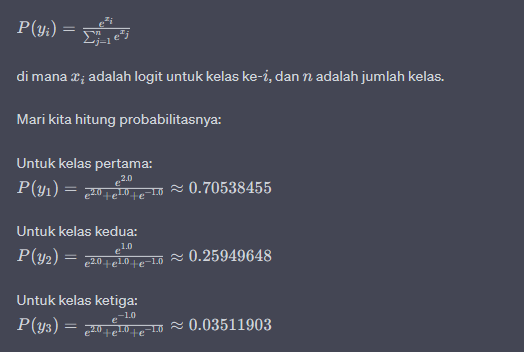

In [161]:
#  penjelasan mengenai logits 
import tensorflow as tf

logits = tf.constant([1.0, 2.0, 3.0])
probabilities = tf.nn.softmax(logits)  # Menerapkan softmax pada logits

# Menggunakan from_logits=False karena kita memiliki probabilitas
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = cross_entropy([2],probabilities)
print(loss.numpy())

0.79719037


In [179]:
# melakukan kompilasi pada model
model.compile(optimizer="adam", loss= tf.losses.SparseCategoricalCrossentropy, metrics=['accuracy'])
#  loss akan diisikan dengan fungsi loss_function 
#  dibawah ini merupakan kegunaan dari optimizer

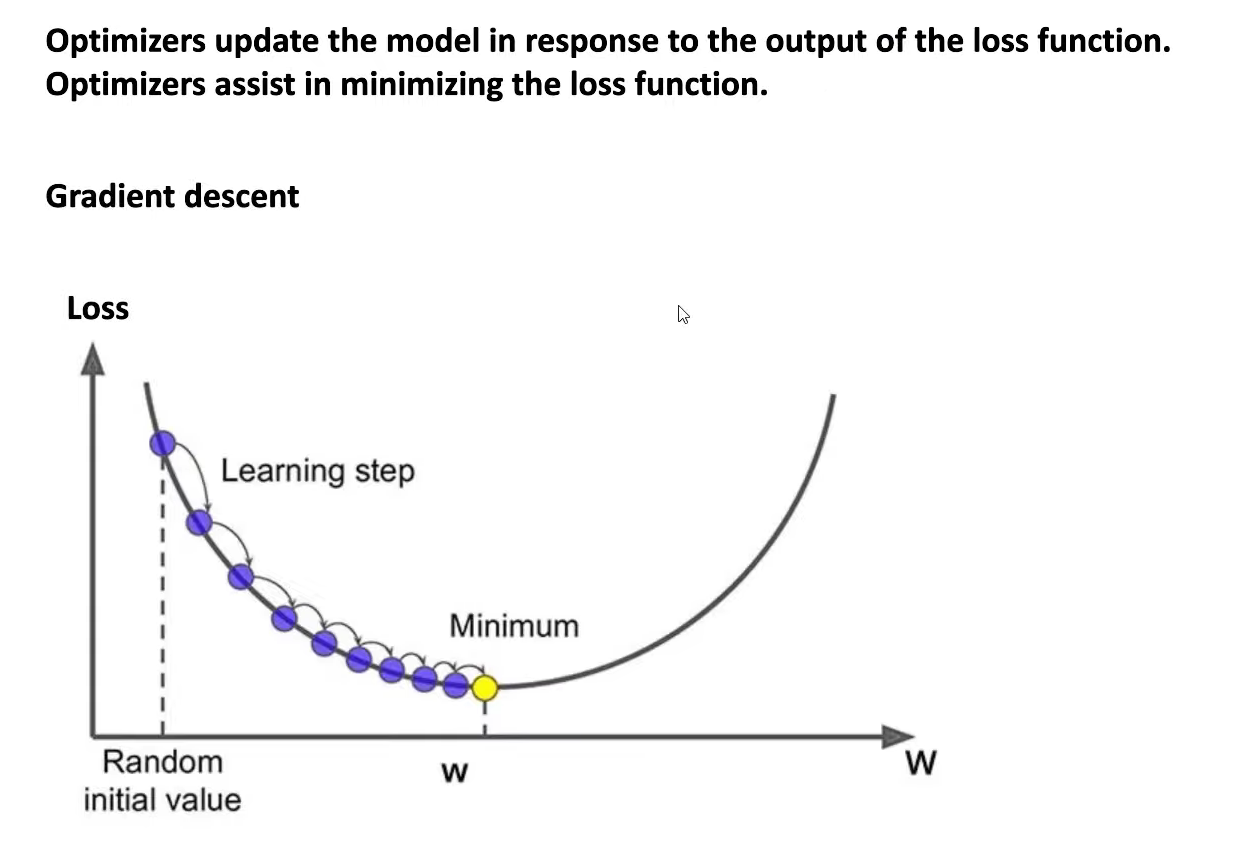

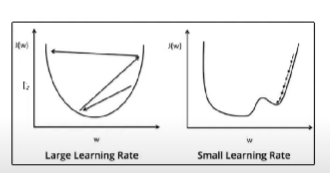


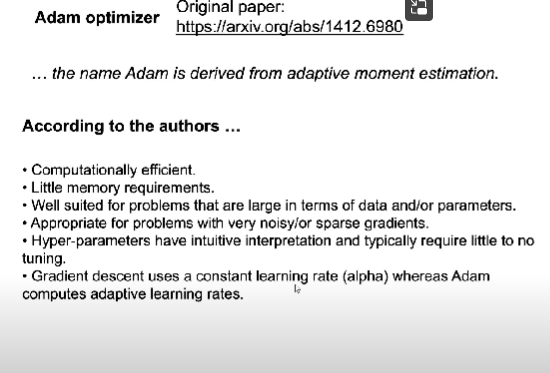

In [180]:
import os
checkpoint_dir = "./model"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix, 
    save_best_only=True
)

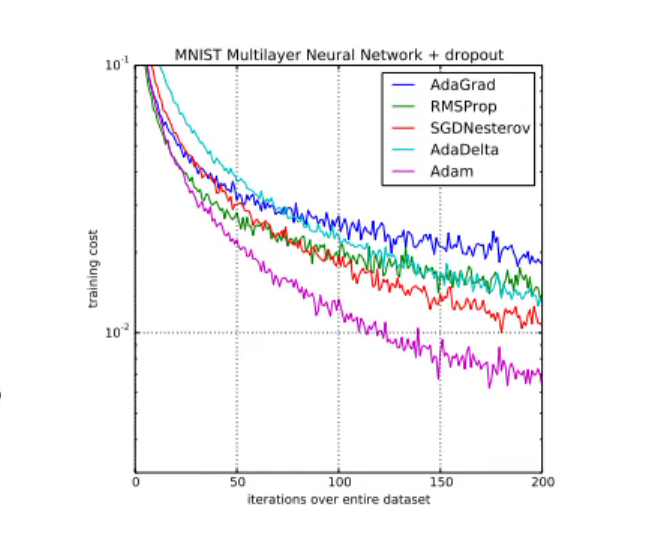

In [1]:
history = model.fit(data, shuffle=50, epochs=2, callbacks=[callback])

NameError: name 'model' is not defined

In [ ]:
model = build_model(VOCAB_SIZE, EMBEDDING_DIM, RNN_UNITS, batch_size=1)

In [177]:
history.history

{'loss': [2.5373265743255615, 1.8287454843521118]}

In [ ]:
tf.losses.SparseCategoricalCrossentropy
#  note : module 6 di skip